# Evaluacion final



### Fase 1: Exploración y Limpieza


1. Exploración Inicial:

Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas
relevantes.

Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de
las columnas involucradas.

Une los dos conjuntos de datos de la forma más eficiente.

2. Limpieza de Datos:

Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

Realiza cualquier ajuste o conversión


In [1]:
# Importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
#pd.set_option('display.max_rows', None)
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# cargamos todos los conjuntos de datos: 

activity = pd.read_csv("file/Customer Flight Activity.csv" )
history = pd.read_csv("file/Customer Loyalty History.csv")

In [3]:
history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [43]:
def exploracion (activity,history):
    
    for df, nombre in zip([activity,history], ["activity", "history"]):
        print(f"INFORMACIÓN SOBRE {nombre.upper()}")
        print("La forma:")
        print(f"{df.shape}\n")
        print("Las columnas:")
        print(f"{df.columns}\n")
        print("Los tipos de datos:")
        print(f"{df.dtypes}\n")
        print("Los nulos:")
        print(f"{df.isna().sum()}\n")
        print("Los duplicados:")
        print(f"{df.duplicated().sum()}\n")
        print("Los principales estadísticos:")
        print(f"{df.describe().T.round()}\n")
        # Sacamos media y mediana del df2 (history) porque es el que tiene nulos
        columnas_nulas = df.columns[df.isnull().any()]
        if not columnas_nulas.empty:
            print("Media de las columnas nulas:")
            print(df[columnas_nulas].mean().round(2))
            print("\nMediana de las columnas nulas:")
            print(df[columnas_nulas].median())
            print("\n")

        print("-----------------------------\n")

In [44]:
exploracion(activity, history)

INFORMACIÓN SOBRE ACTIVITY
La forma:
(405624, 10)

Las columnas:
Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

Los tipos de datos:
Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

Los nulos:
Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Re

## Conclusion de la tabla activity

1. **Loyalty Number (Número de fidelización)**:
   - Se proporciona un número de fidelización único para cada cliente

2. **Año (Year) y Mes (Month)**:
   - Los datos cubren un período de dos años, desde 2017 hasta 2018.
   - Los datos están distribuidos uniformemente a lo largo de los meses

3. **Flights Booked (Vuelos reservados)**:
   - En promedio, los clientes reservan alrededor de 4 vuelos durante el período especificado, con un máximo de 21 vuelos reservados.

4. **Flights with Companions (Vuelos con acompañantes)**:
   - La mayoría de los clientes no reservan vuelos con compañeros, ya que el valor medio de esta columna es aproximadamente 1, lo que indica que solo ocasionalmente se reservan vuelos con acompañantes.

5. **Total Flights (Total de vuelos)**:
   - La columna "Total Flights" representa la suma de los vuelos reservados por el cliente durante el período especificado. El promedio es de aproximadamente 5 vuelos, con un máximo de 32 vuelos.

6. **Distancia (Distance)**:
   - La distancia promedio de los vuelos reservados es de aproximadamente 1209 kilómetros.
   - La mayoría de los vuelos reservados tienen una distancia entre 0 y 2336 kilómetros, ya que el 75% de los vuelos están dentro de este rango.

7. **Puntos Acumulados y Puntos Canjeados**:
   - Los clientes acumulan en promedio alrededor de 124 puntos durante el período especificado.
   - Sin embargo, el valor medio de puntos canjeados es mucho menor, alrededor de 31 puntos, lo que sugiere que solo una fracción de los puntos acumulados se están canjeando.

8. **Duplicados**:
   - Se identificaron 1864 registros duplicados en la tabla, pero son vuelos de clientes que han realizado vuelos en distintos meses  

## Conclusión de la tabla history 

1. **Información demográfica de los clientes**:
   - Nos enseña las diferentes provincias de Canadá en la que se encuentran los clientes 
   - No hay registros duplicados en el DataFrame.

2. **Datos socioeconómicos**:
   - La columna "Gender" indica el género de los clientes, lo que puede ser útil para análisis demográficos y de segmentación.
   - La columna "Education" proporciona información sobre el nivel educativo de los clientes.
   - La columna "Salary" tiene valores nulos en College, lo que sugiere que no se tiene información salarial para algunos clientes con educación de College.

3. **Datos de fidelización**:
   - La columna "Loyalty Card" indica qué tipo de tarjeta de fidelización tiene cada cliente
   - La columna "CLV" (Customer Lifetime Value) proporciona una medida del valor del cliente a lo largo de su relación con la empresa.
   - Las columnas "Enrollment Year" y "Enrollment Month" indican cuándo se inscribieron los clientes en el programa de fidelización.
   - Las columnas "Cancellation Year" y "Cancellation Month" tienen muchos valores nulos, lo que podría indicar que no todos los clientes han cancelado su membresía.

4. **Estadísticas descriptivas**:
   - Los estadísticos descriptivos proporcionan una visión general de las características numéricas, como salario, CLV y fechas de inscripción y cancelación.
   - La mayoría de los clientes se inscribieron en el programa de fidelización entre 2014 y 2017.
   - Solo un pequeño porcentaje de clientes ha cancelado su membresía.

In [6]:
grupo_educativo = history.groupby('Education')['Salary'].mean()
grupo_educativo

Education
Bachelor                 72451.061575
College                           NaN
Doctor                  178608.897820
High School or Below     61071.718670
Master                  103757.848425
Name: Salary, dtype: float64

In [7]:
salary_college = history[history['Education'] == 'College']['Salary']
salary_college.isnull().sum()

4238

## Union y Limpieza

In [8]:
df_final = pd.merge(history, activity.groupby("Loyalty Number")[
    ["Flights Booked", "Flights with Companions", "Total Flights", "Distance",
     "Points Accumulated", "Points Redeemed", "Dollar Cost Points Redeemed"]
].sum(), on='Loyalty Number', how='left')

# Guardar el DataFrame unido en un archivo CSV llamado 'final.csv'
df_final.to_csv("final.csv", index=False)

In [9]:
df_final.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [10]:
def limpieza(df_final):

    # Convierte los valores de la columna 'Salary' en valores absoluto
    df_final['Salary'] = df_final['Salary'].apply(lambda x: abs(x))#define una función lambda que toma un argumento x y devuelve el valor absoluto de x. 
    
    # Aplicar la función lambda para convertir las columnas 'Cancellation Year' y 'Cancellation Month' a enteros
    df_final['Cancellation Year'] = df_final['Cancellation Year'].apply(lambda x: int(x) if not pd.isna(x) else 0)  #  manteniendo los valores NaN como 0
    df_final['Cancellation Month'] = df_final['Cancellation Month'].apply(lambda x: int(x) if not pd.isna(x) else 0)  # manteniendo los valores NaN como 0
    
    return df_final


In [11]:
df_final_limpio=limpieza(df_final)
df_final_limpio.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
3747,472692,Canada,Ontario,London,M5B 3E4,Male,High School or Below,45654.0,Single,Aurora,18061.92,Standard,2014,8,0,0,147,47,194,45009,4656.00,1215,98
9412,537013,Canada,Ontario,Toronto,P5S 6R4,Male,College,NaN,Single,Nova,17966.29,Standard,2014,1,0,0,135,26,161,36891,3698.25,951,77
9559,669894,Canada,Quebec,Montreal,H2T 2J6,Male,College,NaN,Single,Nova,22062.55,Standard,2014,1,0,0,159,32,191,35880,3655.50,989,80
12052,869164,Canada,Alberta,Edmonton,T9G 1W3,Male,Bachelor,48980.0,Married,Star,2974.31,Standard,2012,8,0,0,129,48,177,39964,4031.88,1287,104
8285,148690,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,70482.0,Married,Nova,8679.84,Standard,2016,11,0,0,135,44,179,29992,2993.00,470,38
3801,652431,Canada,Ontario,Toronto,M2P 4F6,Male,College,NaN,Single,Aurora,19504.47,Standard,2012,4,0,0,0,0,0,0,0.00,0,0
8073,889786,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,83886.0,Married,Nova,8283.07,Standard,2015,12,0,0,103,24,127,33047,3450.25,0,0
5268,871124,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,92259.0,Married,Nova,3644.83,Standard,2014,3,0,0,98,20,118,40063,4103.50,582,47
9981,270862,Canada,Quebec,Montreal,H2T 9K8,Female,Master,127574.0,Married,Star,2227.07,Standard,2013,8,0,0,174,41,215,45951,4619.40,762,62
16184,824462,Canada,Ontario,Trenton,K8V 4B2,Male,College,NaN,Single,Star,15789.65,Standard,2013,5,0,0,127,21,148,32995,3299.64,2032,164


In [12]:
df_final_limpio.shape

(16737, 23)

In [13]:
grupo_educativo = df_final_limpio.groupby('Education')['Salary'].count()
grupo_educativo

Education
Bachelor                10475
College                     0
Doctor                    734
High School or Below      782
Master                    508
Name: Salary, dtype: int64

### Fase 2: Visualización


Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

1.  ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

2.  ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

3.  ¿Cuál es la distribución de los clientes por provincia o estado?

4.  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

5.  ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

6.  ¿Cómo se distribuyen los clientes según su estado civil y género?

###  1.  ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [14]:
#Trabajamos con la tabla activity que es donde tenemos los datos de los meses, agrupamos los numeros de vuelos según el año y el mes  
vuelos_mes = activity.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()
vuelos_mes

,Year,Month,Flights Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


In [15]:
año_2017 = vuelos_mes[vuelos_mes['Year'] == 2017]
año_2018 = vuelos_mes[vuelos_mes['Year'] == 2018]

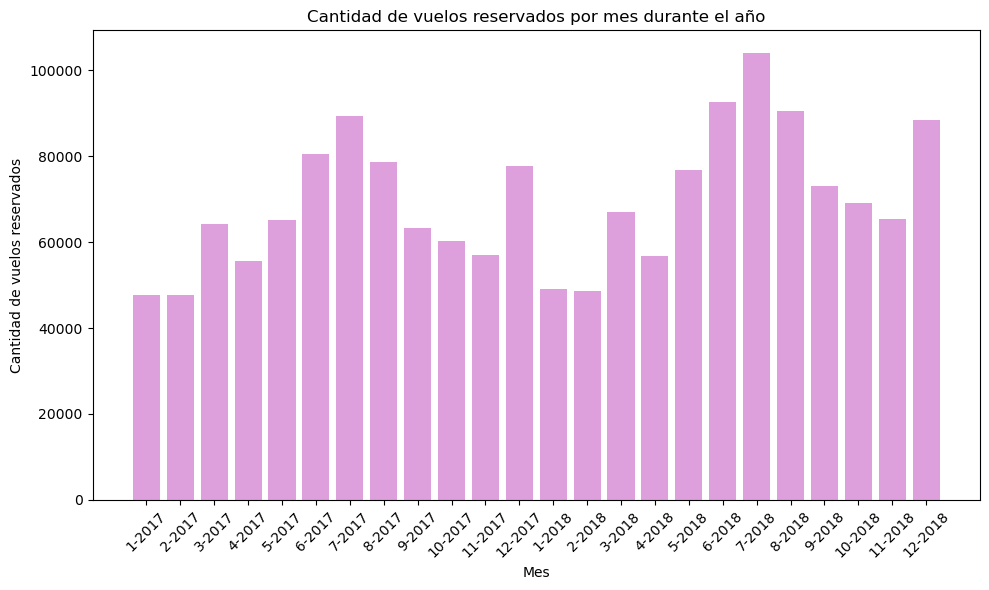

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(vuelos_mes.index, vuelos_mes['Flights Booked'], color='plum')#vuelos_mes como las coordenadas x y 'Flights Booked' como y.
# Los valores del índice representan las etiquetas para el eje x, que corresponden a los años y meses para los cuales se están mostrando los datos de vuelos reservados. 
#Esto proporciona una forma clara de etiquetar los datos en el eje x del gráfico.

# Configurar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.title('Cantidad de vuelos reservados por mes durante el año')
plt.xticks(ticks=vuelos_mes.index, labels=[f"{mes}-{año}" for año, mes in zip(vuelos_mes['Year'], vuelos_mes['Month'])], rotation=45)
#Etiquetas personalizadas para el eje x, que muestran el año y el mes correspondiente. Se utiliza una comprensión de lista para generar las etiquetas utilizando los valores de los años y los meses del DataFrame vuelos_mes.
#La rotación de 45 grados se aplica a las etiquetas del eje x para una mejor legibilidad.


# Mostrar el gráfico
plt.tight_layout()
plt.show()

-Estacionalidad: Se puede observar en la gráfica que los meses de verano **junio, julio y agosto** los vuelos se incrementa así como en navidades **diciembre**

-Tendencia anual: En **2018** ha habido un incremento de la cantidad de vuelos reservados respecto al año 2017

### 2.  ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [17]:
#Para esta pregunta usamos la tabla final_limpia ya que tenemos toda la informacion necesaria
distancia_puntos = df_final_limpio.groupby('Loyalty Number')[['Distance', 'Points Accumulated']].sum().reset_index()
distancia_puntos

,Loyalty Number,Distance,Points Accumulated
0,100018,50682,5376.00
1,100102,40222,4115.25
2,100140,41252,4184.25
3,100214,33982,3426.00
4,100272,40872,4108.04
...,...,...,...
16732,999902,57227,6056.50
16733,999911,0,0.00
16734,999940,23410,2415.00
16735,999982,5948,594.00


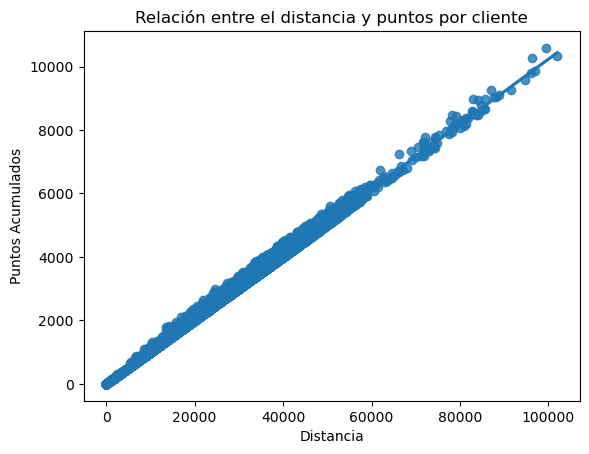

In [45]:
sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = distancia_puntos, 
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Distancia")
plt.ylabel("Puntos Acumulados")

# ponemos título a la gráfica
plt.title("Relación entre el distancia y puntos por cliente");

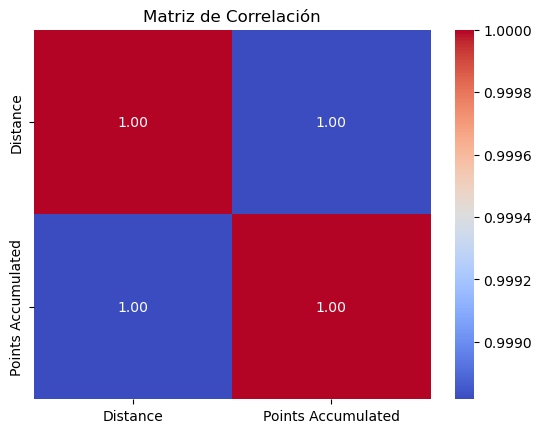

In [19]:
numeric_df = distancia_puntos.select_dtypes(include='number')

# Seleccionar solo las columnas "Distance" y "Points Accumulated"
columnas_seleccionadas = ["Distance", "Points Accumulated"]
numeric_df_subset = numeric_df[columnas_seleccionadas]

# Calcular la matriz de correlación
correlacion_matrix = numeric_df_subset.corr()

# Visualizar la matriz de correlación
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Vemos que hay una correlacion lineal entre la distancia y los puntos lo cual haciendo la correlación vemos que es positiva perfecta (cuando la distanncia aumenta los puntos también) 
Las personas que viajan mas y mas lejos acumulan mas puntos.

### 3.  ¿Cuál es la distribución de los clientes por provincia o estado?



In [20]:
clientes_provincia = df_final_limpio.groupby('Loyalty Number')[["Province"]].sum().reset_index()
clientes_provincia


,Loyalty Number,Province
0,100018,Alberta
1,100102,Ontario
2,100140,British Columbia
3,100214,British Columbia
4,100272,Ontario
...,...,...
16732,999902,Ontario
16733,999911,Newfoundland
16734,999940,Quebec
16735,999982,British Columbia


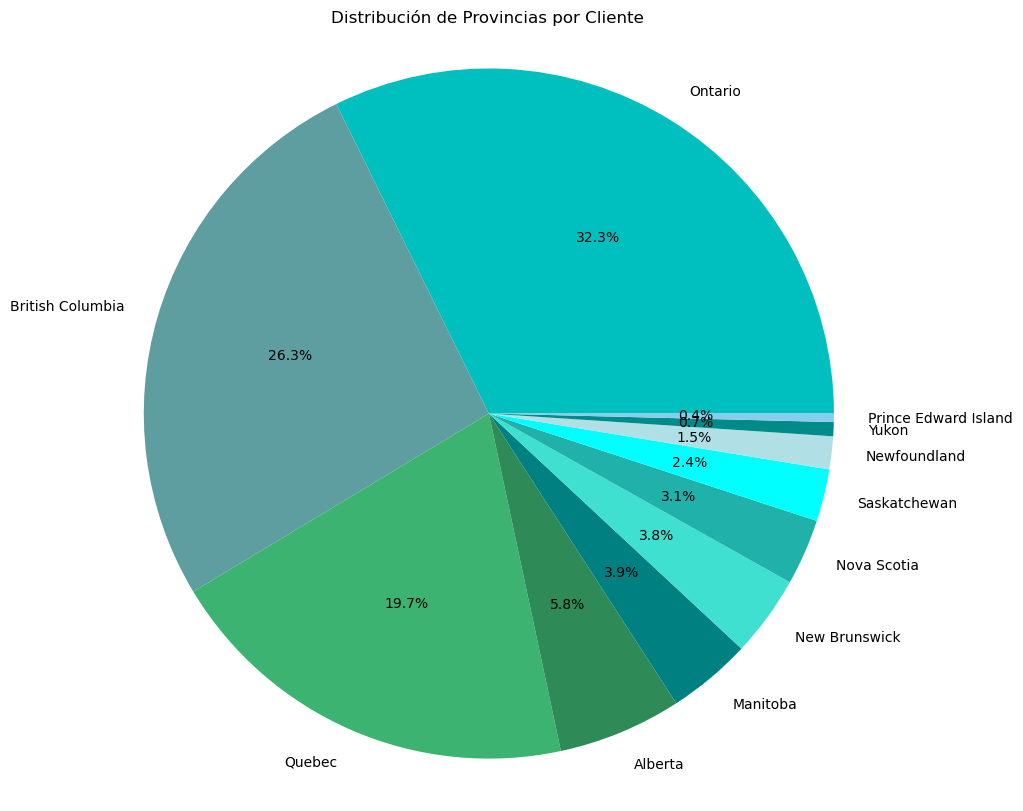

In [21]:
loyalty_numbers = clientes_provincia["Loyalty Number"]
provinces = clientes_provincia["Province"]

# Hacemos una lista de 11 colores 
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen", "aqua","powderblue", "darkcyan","skyblue"]

# Crear el gráfico de pastel
plt.figure(figsize=(12, 10))
plt.pie(provinces.value_counts(), labels=provinces.value_counts().index, autopct='%1.1f%%', colors=colores)
plt.title('Distribución de Provincias por Cliente')
plt.axis('equal')  # Hace que el gráfico de pastel sea circular
plt.show()

In [22]:
df_final_limpio["Province"].value_counts()

Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: Province, dtype: int64

Podemos analizar la frecuencia de aparición de cada provincia en los números de lealtad para comprender dónde se concentran la mayoría de los clientes. Por ejemplo, si hay una alta frecuencia de números de lealtad asociados con una provincia de **Ontario** la cuales tiene  una gran cantidad de cliente. 
Tambien podríamos observar que puede haber mayor cantidad de poblacion en esas provincia lo que influye influir la cantidad de vuelos 

### 4.  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [23]:
# Agrupar los datos por el nivel educativo y calcular el salario promedio
salario_educacion = df_final_limpio.groupby('Education')['Salary'].median().round(2).reset_index()
salario_educacion

,Education,Salary
0,Bachelor,71960.0
1,College,NaN
2,Doctor,182143.5
3,High School or Below,61915.0
4,Master,105487.0


In [24]:
#Preparamos la lista con los tipos de educacion 
tipos_educacion = salario_educacion["Education"].unique().tolist()
tipos_educacion

['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master']

In [25]:
max_salary = df_final_limpio['Salary'].max()

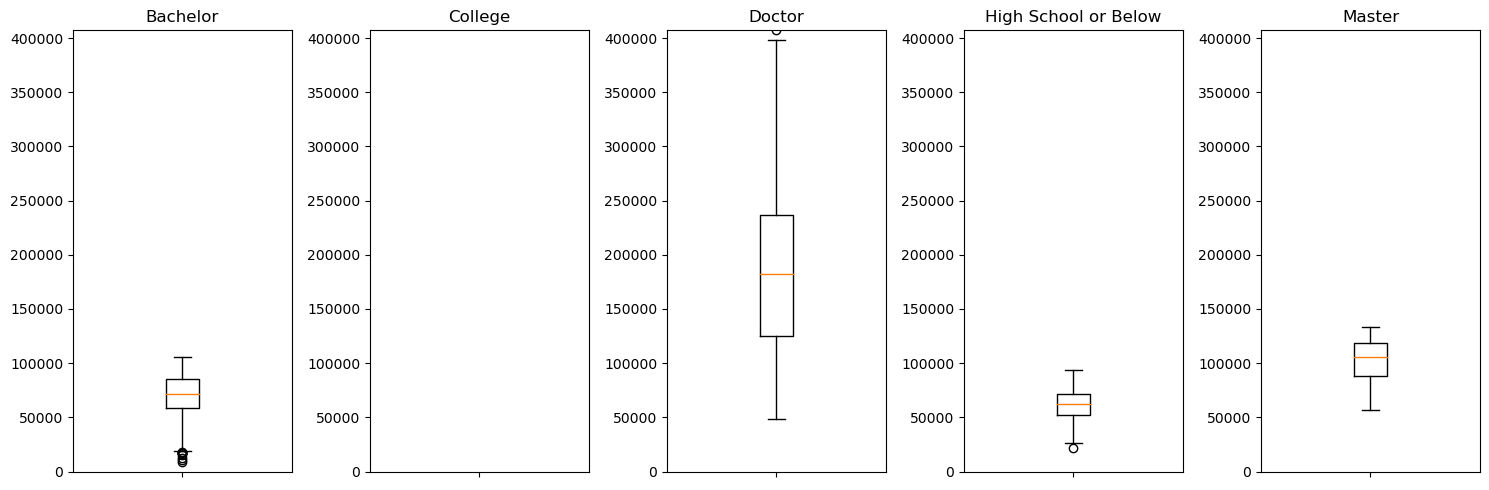

In [26]:
fig, axs = plt.subplots(1, len(tipos_educacion), figsize=(15, 5))

# Iterar sobre cada nivel educativo y crear un boxplot
for i, tipo_educacion in enumerate(tipos_educacion):
    df_box_plot = df_final_limpio[df_final_limpio['Education'] == tipo_educacion]
    if pd.notna(salario_educacion[salario_educacion['Education']==tipo_educacion]['Salary'].all()): # Comprueba si todos los valores en la Serie son True (es decir, si no hay NaN ) False para los valores NaN.
        # Crear el boxplot
        axs[i].boxplot(df_box_plot['Salary'], labels=[""], vert=True)
        axs[i].set_title(tipo_educacion)
        axs[i].set_ylim(0, max_salary)  # Establece los límites del eje y


# Ajusta el espaciado entre los subplots
plt.tight_layout()

plt.show()

-Los clientes con educación Universitaria tienen un salario con una mediana de $71,960.0 , tiene valores atipicos por debajo porque puede ser que seas estudiantes en prácticas 

-No hay datos recopilado de clientes con estudios primarios

-Los clientes con Doctorado tienen el salario más alto, con una mediana de $182,143.5, por lo que vemos que tienen mayor capacidad de gasto y puede que estén dispuestos a viajar más lejos 

-Los clientes con educación de High School or Below tienen un salario con una mediana de $61,915.0, que es el más bajo de todos los grupos.Esto se debe a que sean puestos con oficios repetitivos 

-Los clientes con educación de Master tienen un salario con una mediana de $105,487.0, que se encuentra entre los salarios de los clientes con educación de Bachelor y Doctor.

Como conclusión podemos decir que mientras haya mayor nivel educativo habrá mayor posibilidad de tener salarios altos.


### 5.  ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [27]:
#Agrupamos la suma de los clientes segun la lolalty card
cliente_tarjeta = df_final_limpio.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
cliente_tarjeta

,Loyalty Card,Loyalty Number
0,Aurora,3429
1,Nova,5671
2,Star,7637


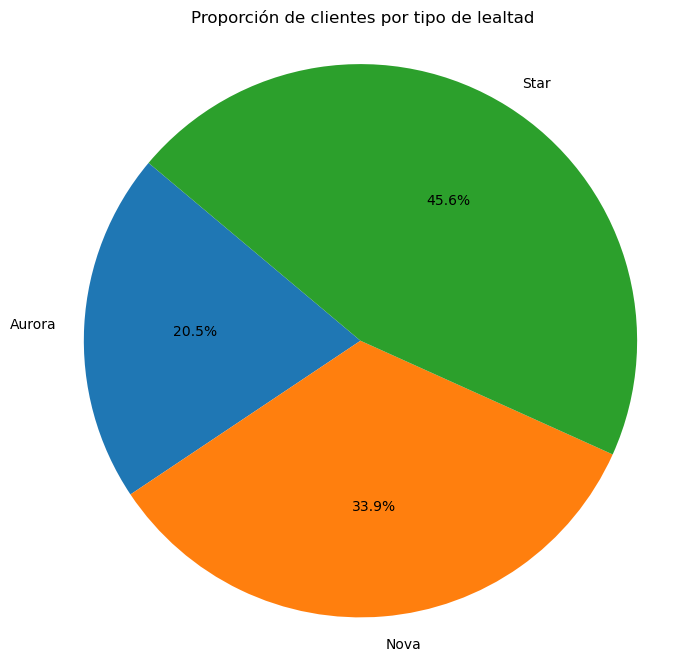

In [42]:
plt.figure(figsize=(8, 8))
plt.pie(cliente_tarjeta['Loyalty Number'], labels=cliente_tarjeta['Loyalty Card'], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de clientes por tipo de lealtad')
plt.axis('equal')  # Hacer que el gráfico sea circular
plt.show()

La tarjeta **Star** es la más popular entre el resto con un **45.6%** de fidelizaciones, la aerolínea podría estar ofreciendo una variedad de beneficios atractivos a los titulares con esta tarjeta, como acumulación acelerada de puntos, acceso a salas VIP, prioridad en el embarque, asignación de asientos preferentes, franquicia de equipaje adicional, descuentos exclusivos en tarifas aéreas y otros servicios relacionados con los viajes. 

### 6.  ¿Cómo se distribuyen los clientes según su estado civil y género?

In [29]:
genero_estado = df_final_limpio.groupby(["Marital Status", "Gender"])["Loyalty Number"].count().reset_index()
genero_estado

,Marital Status,Gender,Loyalty Number
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


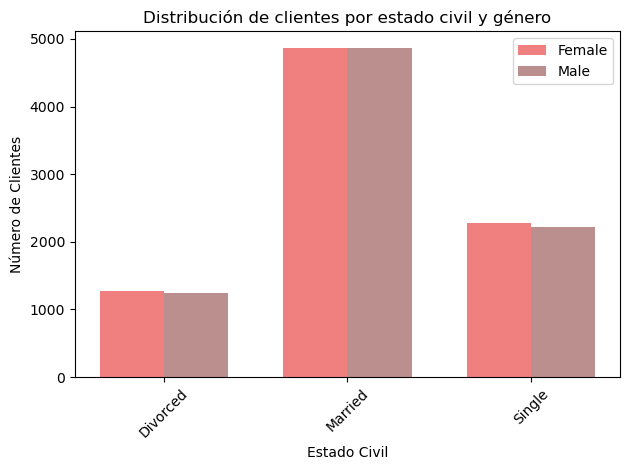

In [30]:
# Datos separado para barplot
marital_status = genero_estado["Marital Status"].unique()  # Obtener estados civiles únicos
female_count = genero_estado[genero_estado["Gender"] == "Female"]["Loyalty Number"]  # Conteo de clientes femeninos
male_count = genero_estado[genero_estado["Gender"] == "Male"]["Loyalty Number"]  # Conteo de clientes masculinos

# Configuración del gráfico
x = list(range(len(marital_status)))# Lista de posiciones
width = 0.35  # Ancho de las barras

# Crear gráfico de barras agrupadas
fig, ax = plt.subplots()
# Corregir la posición de las barras
bar1 = ax.bar([pos - width/2 for pos in x], female_count, width, label='Female', color= "lightcoral")  
bar2 = ax.bar([pos + width/2 for pos in x], male_count, width, label='Male', color="rosybrown")  

# Etiquetas, título y leyenda
ax.set_xlabel("Estado Civil")
ax.set_ylabel("Número de Clientes")
ax.set_title("Distribución de clientes por estado civil y género")
ax.set_xticks(x)
ax.set_xticklabels(marital_status)
ax.legend()

# Rotación de las etiquetas del eje x
plt.xticks(rotation=45)
plt.tight_layout()  # Ajuste automático del diseño
plt.show() 

Podemos observar que el estado civil de Casado tiene la mayor cantidad de clientes tanto para hombres como para mujeres, puede que la aerolinea esté usando estrategias de marketing y fidelización de clientes como  paquetes adaptados específicamente a las necesidades y preferencias de las parejas y familias, como promociones para lunas de miel, paquetes vacacionales familiares o servicios de viaje para eventos especiales.


En segundo lugar están el grupo de solteros seguido de los divorciados, para captar la atencion de estos grupos la aerolinea podría organizar eventos y actividades a  destinos atractivos para los viajeros solteros, como excursiones grupales, tours culturales, eventos deportivos o fiestas temáticas. Esto les brindaría la oportunidad de conocer a otros viajeros y formar conexiones sociales.

### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo


 Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos
reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
1.  Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

2.  Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

3.  Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
niveles educativos

In [31]:
df_final_limpio.groupby("Education")["Flights Booked"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,99.104821,54.231557,0.0,59.00,113.0,139.0,354.0
College,4238.0,100.613025,54.208810,0.0,62.25,113.0,140.0,324.0
Doctor,734.0,100.866485,55.933391,0.0,58.25,115.0,143.0,292.0
High School or Below,782.0,101.014066,54.867491,0.0,62.00,115.0,139.0,265.0
Master,508.0,101.602362,54.023146,0.0,65.00,113.0,141.0,322.0


In [32]:
from scipy.stats import ttest_ind

In [33]:
df_filtered = df_final_limpio[['Flights Booked', 'Education']]

# Obtener muestras de cada nivel educativo
bachelor_flights = df_filtered[df_filtered["Education"] == "Bachelor"]["Flights Booked"]
college_flights = df_filtered[df_filtered["Education"] == "College"]["Flights Booked"]
doctor_flights = df_filtered[df_filtered["Education"] == "Doctor"]["Flights Booked"]
highschool_flights = df_filtered[df_filtered["Education"] == "High School or Below"]["Flights Booked"]
master_flights = df_filtered[df_filtered["Education"] == "Master"]["Flights Booked"]

df_list = [bachelor_flights, college_flights, doctor_flights, highschool_flights, master_flights]
name_list = ["bachelor", "college", "doctor", "hightschool", "master"]

Teoria
- H0: No existe diferencia significativa
- H1: Hay diferencia significativa
    - p_value > 0.05 Aceptamos H0 --> No hay diferencia
    - p_value < 0.05 Rechazamos la hipótesis nula --> Hay diferencias

In [34]:
for i in range(len(df_list)):
    for j in range(i+1, len(df_list)): #permite comparar todas las combinaciones posibles de grupos dos a dos.
        
        # Realizar la prueba t de Student
        t_statistic, p_value = ttest_ind(df_list[i], df_list[j], equal_var=False) #indica que no se asume igual varianza entre las muestras.
        
        # Imprimir los resultados
        print(f"Comparación entre {name_list[i]} y {name_list[j]}:")
        print(f"Valor t: {t_statistic}")
        print(f"Valor p: {p_value}")
        if p_value > 0.05:
            print("son iguales las distribuciones")
        else:
            print("Hay diferencias")
        print("---------------------------")

Comparación entre bachelor y college:
Valor t: -1.52807473344387
Valor p: 0.12653431110817653
son iguales las distribuciones
---------------------------
Comparación entre bachelor y doctor:
Valor t: -0.8265085352252384
Valor p: 0.40875249344081954
son iguales las distribuciones
---------------------------
Comparación entre bachelor y hightschool:
Valor t: -0.9394283496833454
Valor p: 0.3477632733171687
son iguales las distribuciones
---------------------------
Comparación entre bachelor y master:
Valor t: -1.0174276536535911
Valor p: 0.3093911971196923
son iguales las distribuciones
---------------------------
Comparación entre college y doctor:
Valor t: -0.11385610588037594
Valor p: 0.9093750313016749
son iguales las distribuciones
---------------------------
Comparación entre college y hightschool:
Valor t: -0.1881546664749498
Valor p: 0.8507907149971485
son iguales las distribuciones
---------------------------
Comparación entre college y master:
Valor t: -0.389899745291309
Valor p:

- H0: No existe diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos de los clientes. Rechazamos la hipotesis